<h1>Приближенное решение уравнения $f(x)=0$ методом Ньютона</h1>

In [11]:
from matplotlib import pyplot as plt
import numpy as np 
from scipy import optimize as opt
from math import sqrt

${f(x) = ln{ln{x}} - e^{-x^2}}$

${f'(x) = 2xe^{-x^2} + \frac{1}{xln{x}}}$

${f''(x) = e^{-x^2}(2-4x^2) - \frac{1}{x^2ln^2(x)} - \frac{1}{x^2 ln(x)} }$

In [3]:
f = lambda x: np.log(np.log(x))-np.exp(-x**2)
der_f = lambda x: 2*x*np.exp(-x**2)+1/(x*np.log(x))
der2_f = lambda x: np.exp(-x**2)*(2-4*x**2) - 1/(x**2 * np.log(x)**2) - 1/(x**2 * np.log(x))

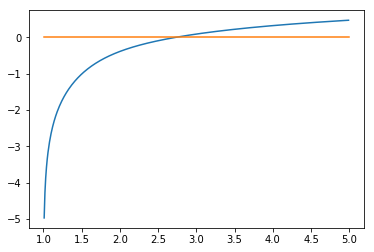

In [5]:
x = np.arange(1.01, 5, 0.01)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

<h3>Функция ${f(x)}$ дважды дифференциируема на ${[1.5, 5.0]}$ и ${f(1.5)*f(5)<0}$, следовательно выполняются условия сходимости метода Ньютона</h3>

Выберем начальное приближение ${x0=2.5}$
Проверим, будет ли выполняться 
${f(x)f''(x) > 0}$

In [6]:
f(2.5)*der2_f(2.5)

0.036597429339471584

Определим значения $m_1$ и $M_2$

In [9]:
m1 = min([abs(der_f(x)) for x in np.arange(1.5,5, 0.01)])
m2 = max([abs(der2_f(x)) for x in np.arange(1.5, 5, 0.01)])
print(m1, m2)

0.12467109925328225 4.53733067455812


По заданному $\varepsilon_0 = 1e-6$ найдем $\varepsilon = \sqrt{2m_1 \varepsilon_0 / M_2}$

In [13]:
eps = sqrt(2*m1*10**-6/m2)
eps

0.0002344216274173975

In [14]:
def newton(f, der_f, x0, eps):
    xc = x0
    while True:
        xn = xc - f(xc)/der_f(xc)
        if abs(xn-xc)<eps:
            return(xn)
        xc = xn

In [16]:
my_sol = newton(f, der_f, 2.5, eps)
my_sol

2.7199475325339133

In [17]:
sc_sol = opt.root_scalar(f, method='brentq', bracket=[1.5,5]).root
sc_sol

2.719947541330329

In [18]:
sc_sol - my_sol

8.796415595924145e-09